In [1]:
# importing the initial libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data from the train set

data = pd.read_csv('C:\\Users\\DELL\\Kaggle\\Challenges\\titanic\\train.csv')

In [3]:
# visualising the main data

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Variable - Definition -  Key
# survival: Survival: 0 = No, 1 = Yes
# pclass: Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
# sex: Sex: male, female
# Age: Age in years
# sibsp: # of siblings / spouses aboard the Titanic
# parch: # of parents / children aboard the Titanic	
# ticket: Ticket number
# fare: Passenger fare
# cabin: Cabin number
# embarked: Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
# EXPLORING THE DATA

# 1. Metadata - Dtypes
# 2. Descriptive Statistics - describe
# 3. Frequencys - value_counts()
# 4. Correlation between integer variables - correlation matrix
# 5. Data Balance
# 6. Check for Nulls

In [6]:
# 1. Metadata - Dtypes

data.dtypes

# ID: PassengerID
# TARGET: Survided
# NUMERICAL: Age, SibSp, Parch, Fare
# CATEGORICAL: Pclass, Sex, Cabin, Embarked

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# 2. Descriptive Statistics - describe

data.describe()

# Age - mean: 29, std: 14, min: 0.4, max: 80
# SibSp - mean: 0.5, std: 1.1, min: 0, max: 8
# Parch - mean: 0.4, std: 0.8, min: 0, max: 6
# Fare - mean: 32, std: 49, min: 0, max: 512

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# 3. Frequencys - value_counts()

# CATEGORICAL: Pclass

data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
# CATEGORICAL: Sex

data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
# CATEGORICAL: Cabin

data['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
D              3
              ..
C99            1
B39            1
B94            1
C45            1
C101           1
Name: Cabin, Length: 147, dtype: int64

In [11]:
# CATEGORICAL: Embarked

data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

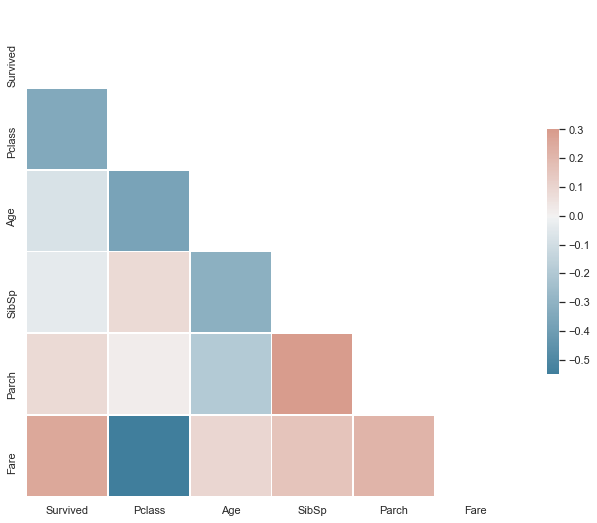

In [12]:
# 4. Correlation between integer variables - correlation matrix

sns.set_theme(style="white")

# Generate a large random dataset

# Compute the correlation matrix
corr = data[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
# General takeways from the correlation matrix:

# TARGET: Positive correlations: Fare | Negative correlations: Pclass

# FEATURES: High correlations between themselfs: Fare-Pclass, SibSp-Parch

# Probably drop the Fare and Parch


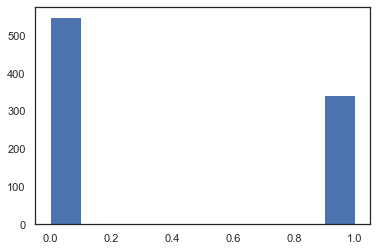

In [14]:
# 5. Data Balance

plt.hist(data['Survived'])
plt.show()

# is a bit imbalanced towards the 'not survived side'

In [15]:
# 6. Check for Nulls

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# DATA CLEANING AND TRANSFORMATION:

# 1. Transform Sex to Boolean (Male: 0, Female: 1)
# 2. Drop columns that are no use for the algorihm (Fare, Parch, Ticket, Cabin, SibSp)
# 3. Hot-encode the categorical features
# 4. Get a new feature: titleholder
# 5. Dealing with the nulls from Age and Embarked

In [17]:
# 1. Transform Sex to Boolean (Male: 0, Female: 1)

def sex(row):
    if row == 'male':
        return 0
    else:
        return 1
    
data['Sex'] = data['Sex'].apply(sex)

In [18]:
# 2. Drop columns that are no use for the algorihm (Fare, Parch, Ticket, Cabin)

data.drop(columns=['Fare', 'Parch', 'Ticket', 'Cabin','Age','SibSp'], inplace=True)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,S
4,5,0,3,"Allen, Mr. William Henry",0,S


In [19]:
# 3. Hot-encode the categorical features

data_dummied = pd.get_dummies(data, columns=['Pclass','Embarked'])
data_dummied.head()

,PassengerId,Survived,Name,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",0,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",1,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",0,0,0,1,0,0,1


In [20]:
# 4. Get a new feature: titleholder

import re

def titleholder(row):
    return re.findall(", .+\.", row)[0].replace(',','').split()[0]

data_dummied['title'] = data_dummied['Name'].apply(titleholder)

titles = ['Mr.','Mrs.','Master.','Miss.']

def title_holder(row):
    if row in titles:
        return 0
    else:
        return 1

data_dummied['title_holder?'] = data_dummied['title'].apply(title_holder)

data_cleaned = data_dummied.drop(columns=['Name','title'])


In [21]:
data_cleaned.head()

,PassengerId,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,title_holder?
0,1,0,0,0,0,1,0,0,1,0
1,2,1,1,1,0,0,1,0,0,0
2,3,1,1,0,0,1,0,0,1,0
3,4,1,1,1,0,0,0,0,1,0
4,5,0,0,0,0,1,0,0,1,0
